In [ ]:
import os
import pandas as pd
import numpy as np

path = os.getcwd() # relative path
data = pd.read_csv(path +'/data.csv',encoding='gbk')

In [ ]:
data1 = data[data['P.Value'] < 0.15]

In [ ]:
data4 = data.iloc[0:19463,30:78]
data5 = data4.T

In [ ]:
data2 = data1.iloc[0:2322,30:78]

In [ ]:
data3 = data2.T

In [ ]:
y = data3.iloc[0:48,1:2]

In [ ]:
x = data3.iloc[0:48,2:2232]
#x = data5.iloc[0:48,2:19463]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [ ]:
import matplotlib.pyplot as plt
import re
from sklearn.linear_model import LinearRegression, Ridge, Lasso, BayesianRidge, ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from datetime import *



In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from imblearn.over_sampling import SMOTE  # SMOTE 
overstamp = SMOTE(ratio='auto',random_state=0,k_neighbors=2,m_neighbors=10,out_step=0.5,kind='regular',svm_estimator=None,n_jobs=1)
SMOTE_train_x, SMOTE_train_y = overstamp.fit_sample(x_train, y_train)
SMOTE_test_x, SMOTE_test_y = overstamp.fit_sample(x_test, y_test)

In [ ]:
## RF
model = RandomForestClassifier()
k = model.fit(SMOTE_train_x,SMOTE_train_y)
#print(model.score(SMOTE_train_x,SMOTE_train_y))
#print(model.score(SMOTE_test_x, SMOTE_test_y))

In [ ]:
sorted_feature_importance=sorted(model.feature_importances_, reverse=1)

In [ ]:
selected_feature_importance = list(filter(lambda x: x > 0, sorted_feature_importance))
len(selected_feature_importance)

33

C:\Users\nikki\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


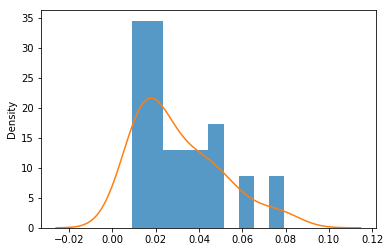

In [ ]:
plt.hist(selected_feature_importance,10,normed=1, alpha=0.75)
s1 = pd.Series(selected_feature_importance)
s1.plot(kind = 'kde')

In [ ]:
from scipy import stats
#chi2 distribution
FI = selected_feature_importance
chi_S = stats.chi2.fit(FI)
df_chi = chi_S[0]
loc_chi = chi_S[1]
scale_chi = chi_S[2]
chi2 = stats.chi2.rvs(df=df_chi,loc=loc_chi,scale=scale_chi,size=len(FI))
stats.ks_2samp(FI,chi2)

Ks_2sampResult(statistic=0.18181818181818188, pvalue=0.6014966352109291)

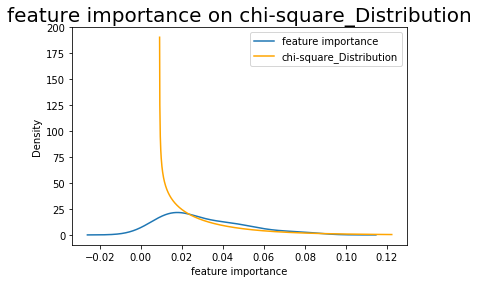

In [ ]:
plt.figure()
s1 = pd.Series(FI)
s1.plot(kind = 'kde')
chiDistribution=stats.chi2(chi_S[0],chi_S[1],chi_S[2]) 
x=np.linspace(chiDistribution.ppf(0.01),chiDistribution.ppf(0.99),1000)

plt.plot(x,chiDistribution.pdf(x),c='orange')
plt.xlabel('feature importance')
plt.title('feature importance on chi-square_Distribution', size=20)
plt.legend(['feature importance','chi-square_Distribution'])

C:\Users\nikki\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


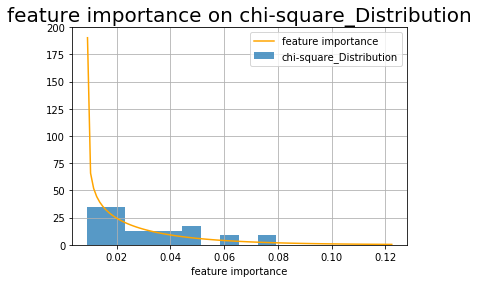

In [ ]:
## plt.figure()
s1 = pd.Series(FI)
#s1.plot(kind = 'kde')
plt.hist(FI,10,normed=1, alpha=0.75)
plt.title('Fare')
plt.grid(True)

chiDistribution=stats.chi2(chi_S[0],chi_S[1],chi_S[2]) 
x=np.linspace(chiDistribution.ppf(0.01),chiDistribution.ppf(0.99),100)

plt.plot(x,chiDistribution.pdf(x),c='orange')
plt.xlabel('feature importance')
plt.title('feature importance on chi-square_Distribution', size=20)
plt.legend(['feature importance','chi-square_Distribution'])

In [ ]:
chiDistribution.ppf(0.05)

0.009501211619733527

In [ ]:
#feature importance
features=zip(x.columns, model.feature_importances_)
sorted_features=sorted(features, key=lambda x: x[1], reverse=1)

In [ ]:
sorted_features

[(5779, 0.07944444444444444),
 (13874, 0.07448275862068966),
 (4565, 0.06104795178941143),
 (8617, 0.059318699124262186),
 (4828, 0.05131578947368422),
 (7856, 0.04834121148459383),
 (17391, 0.04708741258741258),
 (17281, 0.046288269693842456),
 (2486, 0.04126984126984127),
 (15738, 0.04045977011494252),
 (4916, 0.03922736093582488),
 (4782, 0.0347041847041847),
 (17618, 0.03245614035087719),
 (18152, 0.030970982142857144),
 (5451, 0.02910839160839161),
 (1822, 0.024025974025974027),
 (11525, 0.023804195804195804),
 (17366, 0.020982986767485813),
 (18209, 0.02055555555555556),
 (4702, 0.01985552115583076),
 (16920, 0.019698314108251996),
 (17673, 0.01934640522875817),
 (7280, 0.017338620230700975),
 (658, 0.016381438910174535),
 (18657, 0.016228070175438595),
 (17907, 0.014509803921568625),
 (12955, 0.010943507837917778),
 (7761, 0.010702479338842982),
 (14990, 0.010669920141969833),
 (12523, 0.010364145658263307),
 (5984, 0.010323660714285716),
 (4662, 0.009610389610389614),
 (10830, 

In [ ]:
selected_features = list(filter(lambda x: x[1] > 0.0095, sorted_features))
len(selected_features)

32

In [ ]:
a = list(zip(*selected_features))
f = list(a[0])
f

[5779,
 13874,
 4565,
 8617,
 4828,
 7856,
 17391,
 17281,
 2486,
 15738,
 4916,
 4782,
 17618,
 18152,
 5451,
 1822,
 11525,
 17366,
 18209,
 4702,
 16920,
 17673,
 7280,
 658,
 18657,
 17907,
 12955,
 7761,
 14990,
 12523,
 5984,
 4662]

In [ ]:
survival = f + [0,1]

In [ ]:
survival_data = data3[survival]
#survival_data.to_csv('survival_data.csv')

In [ ]:
signature_gene = [2536,2336,9349,10253,17732,9589,10535] # Result from Cox analysis
X_test = x_test[signature_gene]
X_train = x_train[signature_gene]

In [ ]:
from sklearn.metrics import roc_curve, auc
m = 10
acc = 0
prec = 0
rec = 0
f1 = 0
auc_roc = 0

for j in range(m):
    lsvc = LinearSVC()                      # LinearSVC
    lsvc.fit(X_train,y_train)                # train svm based on 7 signature genes
    y_pred = lsvc.predict(X_test)
    
    acc += accuracy_score(y_test,y_pred)
    prec += precision_score(y_test,y_pred)
    rec += recall_score(y_test,y_pred)
    f1 += f1_score(y_test,y_pred)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    auc_roc += auc(fpr, tpr)
    #print('AUC is：',auc(fpr, tpr))
    
acc = acc/m
prec = prec/m
rec = rec/m
f1 = f1/m
auc_roc = auc_roc/m


#print('Accuracy is：',acc)
#print('Precision is：',prec)
#print('Recall is：',rec)
#print('AUC is：',auc_roc)

In [ ]:
m = 1
acc_all = 0
prec_all = 0
rec_all = 0
f1_all = 0
auc_roc_all = 0

for j in range(m):
    lsvc = LinearSVC()                      # LinearSVC
    lsvc.fit(x_train,y_train)                # train svm based on all genes
    y_pred = lsvc.predict(x_test)
    
    acc_all += accuracy_score(y_test,y_pred)
    prec_all += precision_score(y_test,y_pred)
    rec_all += recall_score(y_test,y_pred)
    f1_all += f1_score(y_test,y_pred)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    auc_roc_all += auc(fpr, tpr)
    #print('AUC is：',auc(fpr, tpr))
    
acc_all = acc_all/m
prec_all = prec_all/m
rec_all = rec_all/m
f1_all = f1_all/m
auc_roc_all = auc_roc_all/m


#print('Accuracy is：',acc_all)
#print('Precision is：',prec_all)
#print('Recall is：',rec_all)
#print('AUC is：',auc_roc_all)

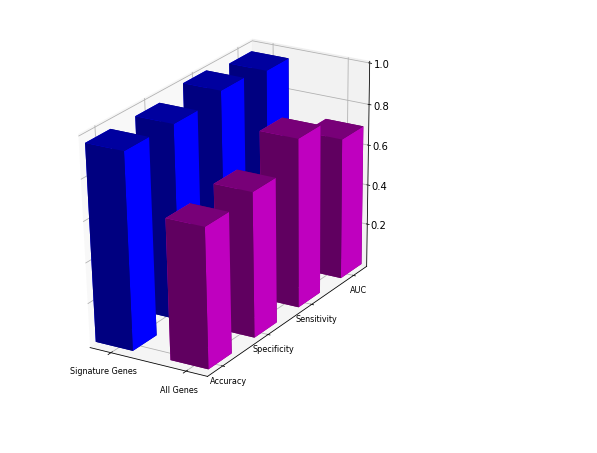

In [ ]:
import mpl_toolkits.mplot3d
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig)

#ax=plt.subplot(projection='3d')
ax.bar3d(0, 6, 0, 1, 1, acc, color='b')
ax.bar3d(0, 4, 0, 1, 1, prec, color='b')
ax.bar3d(0, 2, 0, 1, 1, rec, color='b')
ax.bar3d(0, 0, 0, 1, 1, auc_roc, color='b')

ax.bar3d(2, 6, 0, 1, 1, acc_all, color='m')
ax.bar3d(2, 4, 0, 1, 1, prec_all, color='m')
ax.bar3d(2, 2, 0, 1, 1, rec_all, color='m')
ax.bar3d(2, 0, 0, 1, 1, auc_roc_all, color='m')

plt.xticks([0.5,2.5],['Signature Genes','All Genes'],size=8)
plt.yticks([0.5,2.5,4.5,6.5],['Accuracy','Specificity','Sensitivity','AUC'],size=8)
ax.set_zticks([0.2,0.4,0.6,0.8,1.0])
#ax.set_zlim((0.5,1))

plt.xlim((0,3))
plt.ylim((0,7))

ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([3, 7, 7, 7]))


plt.show()